# Normal Distribution
<a id="top"></a>

# Contents

 - [Introduction](#Introduction)
 - [Python Imports](#imports)
 - [Generate a sample of random normal data](#generatesample)
     - [Tests for Normal Distribution](#testnormal1)
        1. [Visual method using a histogram](#histtest1)
        2. [Visual method using a Q-Q plot](#qqplottest1)
        3. [Formal statistical test: Shapiro-Wilk test](#shapirowilktest1)
        4. [Formal statistical test: Kolmogorov-Smirnov Test](#kolmogorovsmirnovtest1)
        - [Test if Mean, Mode and Median are equal](#meanmedianmode)
 - [Generate Non-normal Distribution](#generatenonnormal)
     - [Tests for Normal Distribution](#testnormal2)
         1. [Visual method using a histogram](#histtest2)
         2. [Visual method using a Q-Q plot](#qqplottest2)
         3. [Formal statistical test: Shapiro-Wilk test](#shapirowilktest2)
         4. [Formal statistical test: Kolmogorov-Smirnov Test](#kolmogorovsmirnovtest2)
 - [Normally Distributed Data Sample from Kaggle](#normalkaggle)
     - [Tests for Normal Distribution](#testnormal3)
         1. [Visual method using a histogram](#histtest3)
              - [Step-by-Step Drawing of Histogram](#stepbystephist)
         2. [Visual method using a Q-Q plot](#qqplottest3)
         3. [Formal statistical test: Shapiro-Wilk test](#shapirowilktest3)
         4. [Formal statistical test: Kolmogorov-Smirnov Test](#kolmogorovsmirnovtest3)
 - [Normal Distribution represented by the Probability Density Function](#probdensityfunc)
 - [Bibliography](#Bibliography)

## Introduction

Normal distribution is also known as the Gaussian distribution. It was first discovered by Carl Friedrich Gauss, hence the name. (Chen 2022)

All distributions describe how the values of a variable are distributed.

Normal Distribution describes the distribution of values for many natural phenomena, for example height of adult males in Ireland, IQ scores, etc.

It is a very important probability distribution in statistics. It is a continuous probability distribution that is symmetrical around it's mean. When plotted on a graph it will give you what is commonly known as a __Bell Curve__ (Evans 2017)

Normal Distribution has the following properties (CFI Team 2022):

* "It is symmetrical", meaning it can be divided down the middle and each half would be equal.

* It's mean, mode and median are equal

* Empirical rule - The data in a Normally distributed dataset lies at a constant distance from the mean, for example approximately:
    * 68% of the data falls within one standard deviation of the mean
    * 95% of the data falls within two standard deviations of the mean
    * 99% of the data falls within three standard deviations of the mean
    
* Skewness, which measures the symmetry of a distribution in Normal Distribution is zero.
 
* Kurtosis, which measures the size of the 2 tails combined, in Normal distribution is equal to 3. If Kurtosis is greater than 3 the dataset has heavier tails and if the kurtosis is less than 3 it's tails are lighter. Excess Kurtosis is calculated by subtracting the kurtosis from 3, thus giving the Normal Distribution an excess Kurtosis of zero.
 
 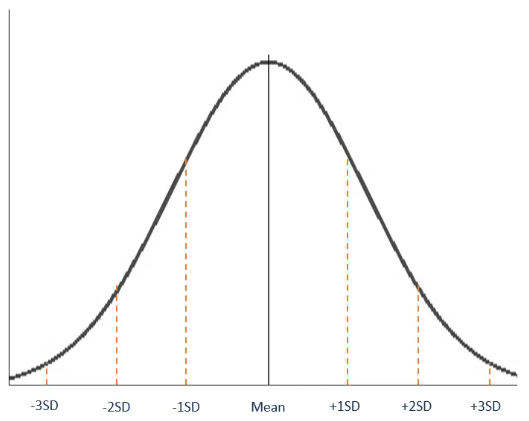
 <center>(CFI Team 2022)</center>

Links to use:

https://onlinestatbook.com/2/normal_distribution/normal_distribution.html

https://www.middlesex.mass.edu/ace/downloads/tipsheets/normal_cf.pdf

https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics#:~:text=So%2C%20a%20normal%20distribution%20will,of%20probability%20in%20the%20tails.

https://www.kaggle.com/code/gadaadhaarigeek/normal-distribution

https://www.analyticsvidhya.com/blog/2021/05/normal-distribution-an-ultimate-guide/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3915399/

https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/

https://archive.ics.uci.edu/ml/index.php

<a id="imports"></a>

## Python Imports

[Back To Top](#top)

In [207]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
import pylab as py
import seaborn as sns
import math

<a id="generatesample"></a>

## Generate a sample of random normal data

[Back To Top](#top)

In [208]:
# Create new, seeded random number generator (seeded so I will get the same values every time).
rng = np.random.default_rng(1)

# Generate 10,000 numbers on a standard normal distribution.
samples = rng.standard_normal(10000)
samples

array([ 0.34558419,  0.82161814,  0.33043708, ...,  0.30125226,
       -0.77127986,  0.18548426])

There are 4 different ways to check if the data is normally distributed (Statology, 2022) as follows:

1. Visual method using a histogram
2. Visual method using a Q-Q plot
3. Formal statistical test: Shapiro-Wilk test.
4. Formal statistical test: Kolmogorov-Smirnov test

I will perform each of these tests now.

<a id = "testnormal1"></a>
### Tests for Normal Distribution

[Back To Top](#top)

<a id="histtest1"></a>
### 1. Visual method using a histogram

[Back To Top](#top)

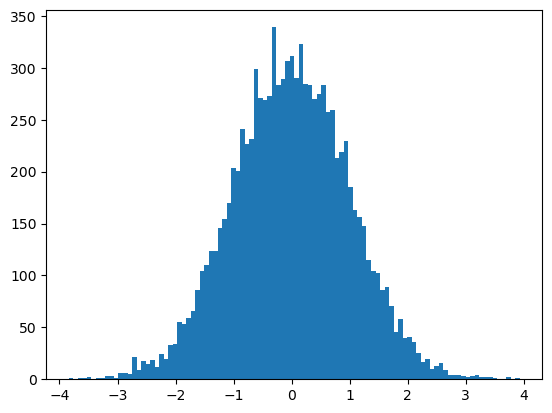

In [209]:
# Create a figure.
fig, ax = plt.subplots()

# Create histogram.
ax.hist(samples, bins=100)

plt.show()

#sns.displot(samples, bins=10, kde=True)


#### Visual method using a histogram: Analysis

In the above histogram the data is clearly falling in the familiar bell-shaped curve that indicates a normal distribution. There are anomolies but in general it is the shape of a normal distribution.

<a id = "qqplottest1"></a>
### 2. Visual method using a Q-Q plot

[Back To Top](#top)

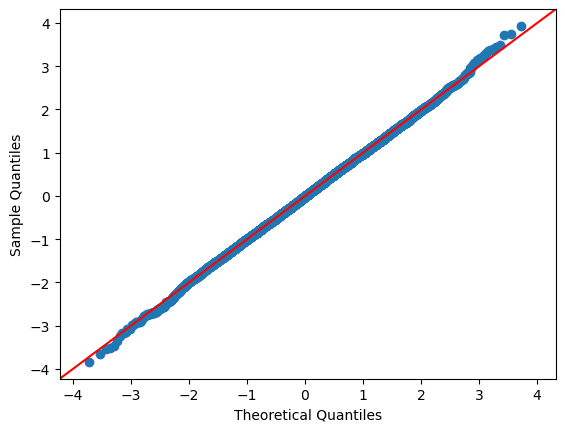

In [210]:
# Create a Q-Q plot. If the points in the plot are approximately in a straight diagonal line
# then it can be assumed that the data is normally distributed (Statology, 2022)
# Othewise it is not.

sm.qqplot(samples, line ='45')
py.show()

#### Visual method using a Q-Q plot: Analysis

As expected, the data falls along the line diagonally. This shows that the data is normally distributed.

<a id = "shapirowilktest1"></a>
### 3. Formal statistical test: Shapiro-Wilk test

[Back To Top](#top)

In [211]:
# Perform Shapiro-Wilk test for normality

stats.shapiro(samples)

C:\Users\elaine.tynan\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9997910261154175, pvalue=0.45775672793388367)

####  Formal statistical Shapiro-Wilk test: Analysis

In the Shapiro-Wilk Test we are testing the Hypotheses that the Sample data is a Normal Distribution. The hypotheses is as follows:

$H_{0}$: p-value > 0.05, sample is normally distribution. (Null hypotheses)

$H_{1}$: p-value <= 0.05, sample is not normally distributed. (Alternate hypothesis)

If the p-value calculated is greater than 0.05 (for a 95% confidence test) then the Null hypotheses cannot be rejected and therefore it would be concluded that the data is normally distributed, Otherwise, the null hypothesis is rejected, and the alternate hypotheses is assumed to be true.

With the above data and test, the p-value is approximately 0.46 which is significantly larger than 0.05. Therefore, the null Hypotheses is not rejected, and the data is concluded to be a Normal Distribution.

<a id = "kolmogorovsmirnovtest1"></a>
### 4.  Formal statistical test: Kolmogorov-Smirnov Test

[Back To Top](#top)

In [212]:
# Perform Kolmogorov-Smirnov test for normality

stats.kstest(samples, 'norm')


KstestResult(statistic=0.008431603741515858, pvalue=0.4732196155357008)

#### Formal statistical Kolmogorov-Smirnov test: Analysis
In the Kolmogorov-Smirno Test we are testing the Hypotheses that the Sample data is a Normal Distribution. The hypotheses are the same as for the Shapiro-Wilk Test and is as follows:

$H_{0}$: p-value > 0.05, sample is normally distribution. (Null hypotheses)

$H_{1}$: p-value <= 0.05, sample is not normally distributed. (Alternate hypothesis)

If the p-value calculated is greater than 0.05 (for a 95% confidence test) then the Null hypotheses cannot be rejected and therefore it would be concluded that the data is normally distributed, Otherwise, the null hypothesis is rejected, and the alternate hypotheses is assumed to be true.

With the above data and test, the p-value is just over 0.47. This is again significantly larger than 0.05. Therefore, the null Hypotheses is not rejected, and the data is concluded to be a Normal Distribution.

<a id = "meanmedianmode"></a>
### Test if Mean, Mode and Median are equal

[Back To Top](#top)

If a dataset is normally distributed the mean, mode and median would all be equal. As we can see from the code below, the mean and median are very close in value(-0.0109 & -0.0094). The Mode shows that there are no repeated values and therefore is not relevant in this case.

*Note*: I used a seed when generating the values so the values (and analysis) should be the same every time.

In [213]:
mean = samples.mean()
print(mean)

median = np.median(samples)
print(median)

mode = stats.mode(samples)
print(mode)

-0.010912901120845201
-0.009417870879801062
ModeResult(mode=array([-3.83786214]), count=array([1]))


<a id = "generatenonnormal"></a>
## Generate Non-normal Distribution

[Back To Top](#top)

Next, I will generate a sample of data that is not Normally distributed and repeat tthe above test to verify that they are correct.

In this example the distribution is chisquare.

In [214]:
# Create new, seeded random number generator.
rng = np.random.default_rng(1)

# Generate 10,000 numbers on a chisquare distribution.
non_norm_sample = rng.chisquare(3, 10000)
non_norm_sample

array([3.16232991, 3.12242578, 4.88646385, ..., 3.55733541, 4.48673887,
       0.60793278])

<a id = "testnormal2"></a>
### Tests for Normal Distribution

[Back To Top](#top)

<a id = "histtest2"></a>
### 1. Visual method using a histogram

[Back To Top](#top)

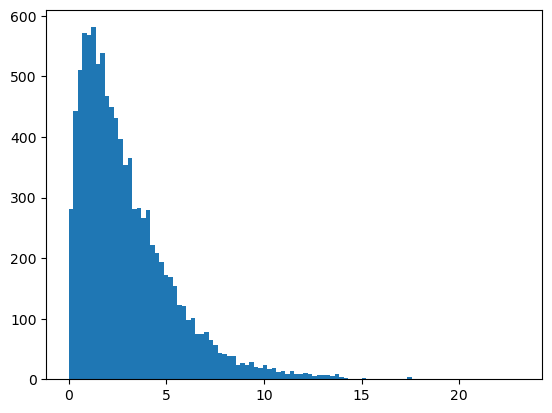

In [215]:
# Create a figure.
fig, ax = plt.subplots()

# Create histogram.
ax.hist(non_norm_sample, bins=100)

plt.show()

#### Visual method using a histogram: Analysis

In the above histogram the data is clearly not falling in the familiar bell-shaped curve that indicates a normal distribution. This shows the dat is not a normal distribution.

<a id = "qqplottest2"></a>
### 2. Visual method using a Q-Q plot

[Back To Top](#top)

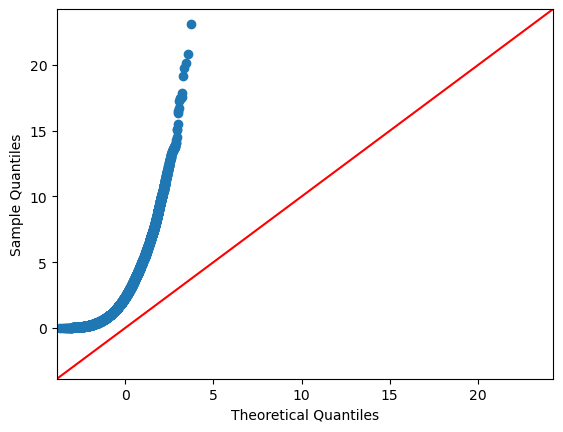

In [216]:
# Create a Q-Q plot. If the points in the plot are approximately in a straight diagonal line
# then it can be assumed that the data is normally distributed (Statology, 2022).
# Othewise it is not.

sm.qqplot(non_norm_sample, line ='45')
py.show()

#### Visual method using a Q-Q plot: Analysis

As expected, the data does not fall along the line diagonally. This shows that the data is not normally distributed.

<a id = "shapirowilktest2"></a>
### 3. Formal statistical test: Shapiro-Wilk test

[Back To Top](#top)

In [217]:
# Perform Shapiro-Wilk test for normality

stats.shapiro(non_norm_sample)

ShapiroResult(statistic=0.8644645810127258, pvalue=0.0)

####  Formal statistical Shapiro-Wilk test: Analysis

In the Shapiro-Wilk Test we are testing the Hypotheses that the Sample data is a Normal Distribution. The hypotheses is as follows:

$H_{0}$: p-value > 0.05, sample is normally distribution. (Null hypotheses)

$H_{1}$: p-value <= 0.05, sample is not normally distributed. (Alternate hypothesis)

If the p-value calculated is greater than 0.05 (for a 95% confidence test) then the Null hypotheses cannot be rejected and therefore it would be concluded that the data is normally distributed, Otherwise, the null hypothesis is rejected, and the alternate hypotheses is assumed to be true.

With the above data and test, the p-value is 0.0 which is less than 0.05. Therefore, the null Hypotheses is rejected, and the data is concluded to not be a Normal Distribution.

<a id = "kolmogorovsmirnovtest2"></a>
### 4.  Formal statistical test: Kolmogorov-Smirnov Test

[Back To Top](#top)

In [218]:
# Perform Kolmogorov-Smirnov test for normality

stats.kstest(non_norm_sample, 'norm')

KstestResult(statistic=0.6424763266401681, pvalue=0.0)

####  Formal statistical Kolmogorov-Smirnov test: Analysis

In the Kolmogorov-Smirnov Test we are again testing the Hypotheses that the Sample data is a Normal Distribution. The hypotheses is as follows:

$H_{0}$: p-value > 0.05, sample is normally distribution. (Null hypotheses)

$H_{1}$: p-value <= 0.05, sample is not normally distributed. (Alternate hypothesis)

If the p-value calculated is greater than 0.05 (for a 95% confidence test) then the Null hypotheses cannot be rejected and therefore it would be concluded that the data is normally distributed, Otherwise, the null hypothesis is rejected, and the alternate hypotheses is assumed to be true.

With the above data and test, the p-value is again 0.0 which is less than 0.05. Therefore, as with the Shapiro-Wilk Test, the null Hypotheses is rejected, and the data is concluded to not be a Normal Distribution.

<a id = "normalkaggle"></a>
## Normally Distributed Data Sample from Kaggle

[Back To Top](#top)

I will now look at a dataset from Kaggle that is normally distributed.

The data has 2 columns one if the year and the second the profit earned in that year. On initial manual inspection there does not seem to be any pattern to the data. When the data is grouped into 'bins' it is clear that most of the  Profits fall into the middle categories (bins), giving the familiar bell-shaped curve.

In [219]:
# Normally distributed data from Kaggle
# Ref: https://www.kaggle.com/datasets/tinasoni/normal-distribution-data/discussion?resource=download&select=CompanyABCProfit.csv

df = pd.read_csv('data/CompanyABCProfit.csv')
df

,Year,Profit
0,1821,1645
1,1822,658
2,1823,1926
3,1824,865
4,1825,764
...,...,...
195,2016,988
196,2017,895
197,2018,-178
198,2019,543


<a id = "testnormal3"></a>
## Tests for Normal Distribution

<a id = "histtest3"></a>
### 1. Visual method using a histogram

[Back To Top](#top)

In [220]:
mu = df['Profit'].mean()
std = df['Profit'].std()
x = df.loc[0]['Profit']

# e is a mathematical constant approximately equal to 2.71828183
e= 2.71828183

firstpart = (1 / (std*(math.sqrt(2 * math.pi))))
secondpart = ((x-mu)**2)/(2*(std**2))
pdf = firstpart * (e**(-1 *secondpart))
print(pdf)

0.00036186425705854176


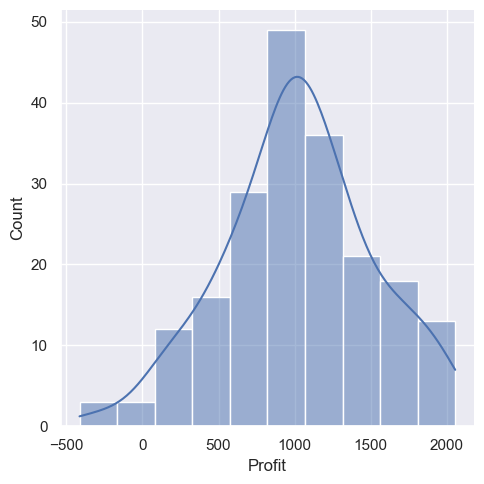

In [244]:
# Using seaborn to draw the bar chart with a line curve to show the bell shape

sns.displot(df['Profit'], bins=10, kde=True)
plt.show()

#### Visual method using a histogram: Analysis

In the above histogram the data is falling in the familiar bell-shaped curve that indicates a normal distribution.

<a id = "stepbystephist"></a>
### Step-by-Step Drawing of Histogram

[Back To Top](#top)

This is the steps involved in drawing a histogram for the data:

1. Create evenly spaced bins

2. Get a count of all values that fall into each bin

3. Draw a histogram of the counts

I will do this in the following code.

In [222]:
# Sorting the data based on the profit column
df_sorted = df.sort_values(by=['Profit'])
df_sorted

,Year,Profit
167,1988,-413
105,1926,-244
197,2018,-178
176,1997,26
146,1967,49
...,...,...
58,1879,1973
168,1989,1996
101,1922,2027
157,1978,2045


In [223]:
# Put in a new index column and replace existing index with new sorted index

df_sorted.insert(0, 'New_ID', range(0, len(df)))
df_sorted.set_index('New_ID', inplace=True)
df_sorted

,Year,Profit
New_ID,,
0,1988,-413
1,1926,-244
2,2018,-178
3,1997,26
4,1967,49
...,...,...
195,1879,1973
196,1989,1996
197,1922,2027


In [224]:
# Put data into bins
# Ref: https://www.statology.org/data-binning-in-python/
# Ref: https://pandas.pydata.org/docs/reference/api/pandas.cut.html

df_sorted['bins'] = pd.cut(df_sorted['Profit'], 10)
df_sorted

,Year,Profit,bins
New_ID,,,
0,1988,-413,"(-415.468, -166.2]"
1,1926,-244,"(-415.468, -166.2]"
2,2018,-178,"(-415.468, -166.2]"
3,1997,26,"(-166.2, 80.6]"
4,1967,49,"(-166.2, 80.6]"
...,...,...,...
195,1879,1973,"(1808.2, 2055.0]"
196,1989,1996,"(1808.2, 2055.0]"
197,1922,2027,"(1808.2, 2055.0]"


In [225]:
# Get a count of the number of values that fall into each bin.
bins = df_sorted['bins'].value_counts()
bins

(821.0, 1067.8]       49
(1067.8, 1314.6]      36
(574.2, 821.0]        29
(1314.6, 1561.4]      21
(1561.4, 1808.2]      18
(327.4, 574.2]        16
(1808.2, 2055.0]      13
(80.6, 327.4]         12
(-415.468, -166.2]     3
(-166.2, 80.6]         3
Name: bins, dtype: int64

In [226]:
# Convert the series to a dataframe
df2 = bins.to_frame()
df2['index1'] = df2.index
df2

,bins,index1
"(821.0, 1067.8]",49,"(821.0, 1067.8]"
"(1067.8, 1314.6]",36,"(1067.8, 1314.6]"
"(574.2, 821.0]",29,"(574.2, 821.0]"
"(1314.6, 1561.4]",21,"(1314.6, 1561.4]"
"(1561.4, 1808.2]",18,"(1561.4, 1808.2]"
"(327.4, 574.2]",16,"(327.4, 574.2]"
"(1808.2, 2055.0]",13,"(1808.2, 2055.0]"
"(80.6, 327.4]",12,"(80.6, 327.4]"
"(-415.468, -166.2]",3,"(-415.468, -166.2]"
"(-166.2, 80.6]",3,"(-166.2, 80.6]"


In [227]:
# Sort the values again, by the bins/buckets
df2_sorted = df2.sort_values(by=['index1'])
df2_sorted

,bins,index1
"(-415.468, -166.2]",3,"(-415.468, -166.2]"
"(-166.2, 80.6]",3,"(-166.2, 80.6]"
"(80.6, 327.4]",12,"(80.6, 327.4]"
"(327.4, 574.2]",16,"(327.4, 574.2]"
"(574.2, 821.0]",29,"(574.2, 821.0]"
"(821.0, 1067.8]",49,"(821.0, 1067.8]"
"(1067.8, 1314.6]",36,"(1067.8, 1314.6]"
"(1314.6, 1561.4]",21,"(1314.6, 1561.4]"
"(1561.4, 1808.2]",18,"(1561.4, 1808.2]"
"(1808.2, 2055.0]",13,"(1808.2, 2055.0]"


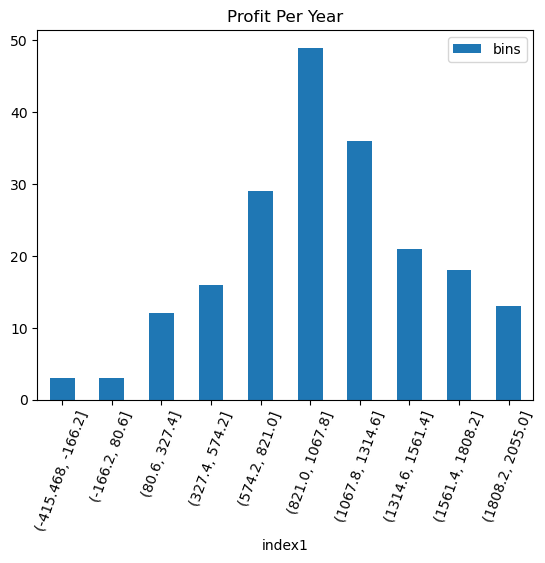

In [228]:
# Plot the data (Should be normally distributed)
ax = df2_sorted.plot.bar(x="index1", y="bins", rot=70, title="Profit Per Year");
plt.show()

<a id = "qqplottest3"></a>
### 2. Visual method using a Q-Q plot

[Back To Top](#top)

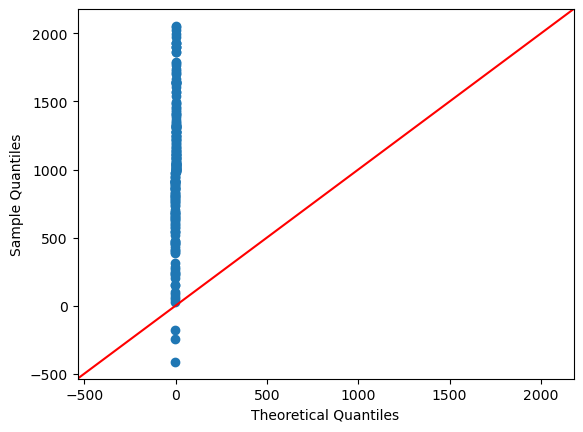

In [229]:
# Create a Q-Q plot. If the points in the plot are approximately in a straight diagonal line
# then it can be assumed that the data is normally distributed (Statology, 2022).
# Othewise it is not.

sm.qqplot(df_sorted['Profit'], line ='45')
py.show()

#### Visual method using a Q-Q plot: Analysis

The data does not fall along the line diagonally.
The Q-Q plot is comparing the quantiles. So, in this case where the Theoretical Quantiles match the residuals it will give a straight vertical line which means the distribution is a good fit
Therefore, we can conclude that the data is not normally distributed. (Sbr, 2022)

<a id = "shapirowilktest3"></a>
### 3. Formal statistical test: Shapiro-Wilk test

[Back To Top](#top)

In [230]:
# Perform Shapiro-Wilk test for normality

stats.shapiro(df_sorted['Profit'])

ShapiroResult(statistic=0.990578830242157, pvalue=0.21675562858581543)

####  Formal statistical Shapiro-Wilk test: Analysis

In the Shapiro-Wilk Test we are again testing the Hypotheses that the Sample data is a Normal Distribution. The hypotheses is as follows:

$H_{0}$: p-value > 0.05, sample is normally distribution. (Null hypotheses)

$H_{1}$: p-value <= 0.05, sample is not normally distributed. (Alternate hypothesis)

With the above data and test, the p-value is approximately 0.22 which is greater than 0.05. Therefore, the null Hypotheses cannot be rejected, and the data is concluded to be a Normal Distribution.

<a id = "kolmogorovsmirnovtest3"></a>
### 4.  Formal statistical test: Kolmogorov-Smirnov Test

[Back To Top](#top)

In [231]:
# Perform Kolmogorov-Smirnov test for normality

stats.kstest(df_sorted['Profit'], 'norm')

KstestResult(statistic=0.985, pvalue=0.0)

#### Formal statistical Kolmogorov-Smirnov test: Analysis
In the Kolmogorov-Smirnov Test we are again testing the Hypotheses that the Sample data is a Normal Distribution. The hypotheses is as follows:

$H_{0}$: p-value > 0.05, sample is normally distribution. (Null hypotheses)

$H_{1}$: p-value <= 0.05, sample is not normally distributed. (Alternate hypothesis)

With the above data and test, the p-value is 0.0 which is less than 0.05 indicating that the data is not a Normal Distribution.

This is in conflict witht the Shapiro-Wilk Test. The Shapiro-Wilk Test concentrates on the tails of the data whereas the Kolmogorov-Smirov Test concentrates on the quantile, which is often in the middle. For this reason, the Shapiro-Wilk Test is preferred and thus we conclude that the data is actually normally distributed. (Gung, 2017)


<a id = "probdensityfunc"></a>
## Normal Distribution represented by the Probability Density Function

[Back To Top](#top)

$$ \frac{1}{\sigma \sqrt(2 \pi)} | e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$

Normal Distribution is represented by the Probability Density Function, but what does this mean?

Nykamp (n.d.) gives the example of guessing numbers. If you were asked to guess a number between 1 and 10, the probability of any number being the correct answer is easily calculated to be 1/10 (or 0.1 or 10%).
*That is assuming the correct answer is a whole number (integer).*
The sum of the probability of all the numbers will always give us 1. In this case the probaby of 1 = 0.1, 2 is 0.1, etc. If we add them all we get 1. It is the same as asking 'If a number were picked from a list of numbers between 1 to 10 includive, what is the probability that any number betwen 1 and 10 will be picked?' obviously this is a certainty, so the probability is 1.

What if you were asked to guess any number between 0 and 1 exclusive? Now the previous assumption can no longer be applied. Since there are an infinite amount of numbers between 0 and 1, then how do we get a probability of any one of them being picked and still hold true the rule that the sum of all probabilities is 1? Nykamp (n.d.) suggests "*we need to think about the probability that x is close to a single number*", this is what the probability Density Function does.

Below is code using the above formula to calculate the probability of a number close to the first value in the column profit occuring. the result is 0.000362 (approximately), which is less than 4 in 10,000 chance of a number close to it occuring. On a continuous scale of numbers this is not a bad probability.

In [232]:
# Calculating the pdf for the first value in the profit column.

mu = df['Profit'].mean()
std = df['Profit'].std()
x = df['Profit'][0]

# e is a mathematical constant approximately equal to 2.71828183
e = 2.71828183

firstpart = (1 / (std*(math.sqrt(2 * math.pi))))
lastpart = ((x-mu)**2)/(2*(std**2))

pdf = firstpart  * (e**(-1 * lastpart))
print(pdf)

0.00036186425705854176


# Bibliography

[Back To Top](#Contents)

CFI Team, (2022) Normal Distribution: Also known as Gaussian or Gauss distribution. Available at: https://corporatefinanceinstitute.com/resources/data-science/normal-distribution/ (Accessed: 08/12/2022)

Chen, J, (2022) Normal Distribution: What It Is, Properties, Uses, and Formula. Available at: https://www.investopedia.com/terms/n/normaldistribution.asp (Accessed: 15 November 2022)

Evans. J.R, (2017) Business Analytics. 2nd Ed. Harlow Essex: Pearson

Gung, R.M. (2017) Inconsistent normality tests: Kolmogorov-Smirnov vs Shapiro-Wilk. Available at: https://stats.stackexchange.com/questions/299012/inconsistent-normality-tests-kolmogorov-smirnov-vs-shapiro-wilk (Accessed: 26 December 2022)

kenton, L. (2022) The Basics of Probability Density Function (PDF), With an Example. Available at: https://www.investopedia.com/terms/p/pdf.asp#:~:text=Probability%20density%20functions%20are%20a,outcomes%20lying%20below%20the%20curve. (Accessed: 30 December 2022)

La Trobe university, (2022) Standard normal distribution and probability. Available at: https://latrobe.libguides.com/maths/probability-and-the-normal-distribution#:~:text=Once%20the%20scores%20of%20a,particular%20value%20can%20be%20found. (Accessed 30 December 2022)

Nykamp D.Q., (n.d.) The idea of a probability density function. Available at: http://mathinsight.org/probability_density_function_idea (Accessed 30 December 2022)

Sbr, A,. (2022) Why is my Normal Q-Q Plot of residuals a vertical line? Available at: https://stackoverflow.com/questions/72984094/why-is-my-normal-q-q-plot-of-residuals-a-vertical-line#:~:text=Regardless%2C%20if%20your%20Q%2DQ%20plot,from%20a%20normal%20distribution%20match. (Accessed 26 December 2022)

Statology, (2022) How to Test for Normality in Python (4 Methods). Available at: https://www.statology.org/normality-test-python/#:~:text=(Visual%20Method)%20Create%20a%20Q%2DQ,assumed%20to%20be%20normally%20distributed.(Accessed 26 December 2022)